# Import libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
#import AllTogether as t
import seaborn as sns
%matplotlib inline

df1= pd.read_csv('2015-building-energy-benchmarking.csv')
#df1.head()
#df1.info()


In [2]:
import json
f = open('socrata_metadata_2016-building-energy-benchmarking.json',)
data = json.load(f)
#data

# Drop Unnecessary Columns

In [3]:
df1=df1[['BuildingType', 'PrimaryPropertyType','Neighborhood', 'YearBuilt','NumberofFloors', 'SiteEUI(kBtu/sf)',
                    'GHGEmissionsIntensity(kgCO2e/ft2)']]

In [5]:
#Drop row with missing value
df1=df1.dropna()
#df1.info()

In [6]:
#Some PrimaryPropertyType has "/n" clean them 
df1['PrimaryPropertyType']=df1['PrimaryPropertyType'].apply(lambda x:x.replace('\n',"" ))

In [10]:
#Find Median of EUI for different "PrimaryPropertyType"
Site_EUI=df1.groupby(['PrimaryPropertyType'])['SiteEUI(kBtu/sf)'].median().to_frame(name = 'Median SiteEUI(kBtu/sf)').reset_index()
Site_EUI.sort_values(by=['Median SiteEUI(kBtu/sf)'], inplace=True,ascending=False)
#Site_EUI

In [11]:
#Find Median of GHG Emissions Intensity for different "PrimaryPropertyType"
GHG_Emission=df1.groupby(['PrimaryPropertyType'])['GHGEmissionsIntensity(kgCO2e/ft2)'].median().to_frame(name = 'Median GHGEmissionsIntensity(kgCO2e/sf)').reset_index()
GHG_Emission.sort_values(by=['Median GHGEmissionsIntensity(kgCO2e/sf)'], inplace=True,ascending=False)
#GHG_Emission

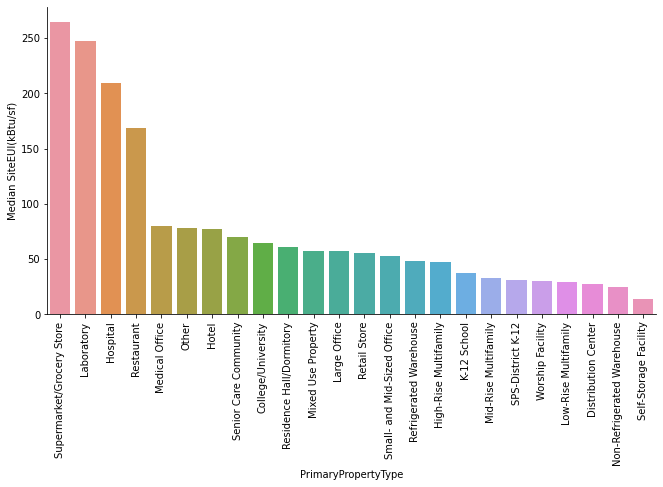

In [12]:
#Print Median EUI bar plot for building Primary Property Type
sns.catplot(x='PrimaryPropertyType', y='Median SiteEUI(kBtu/sf)', data=Site_EUI,height=5,aspect=2,kind='bar')
plt.xticks(rotation=90);

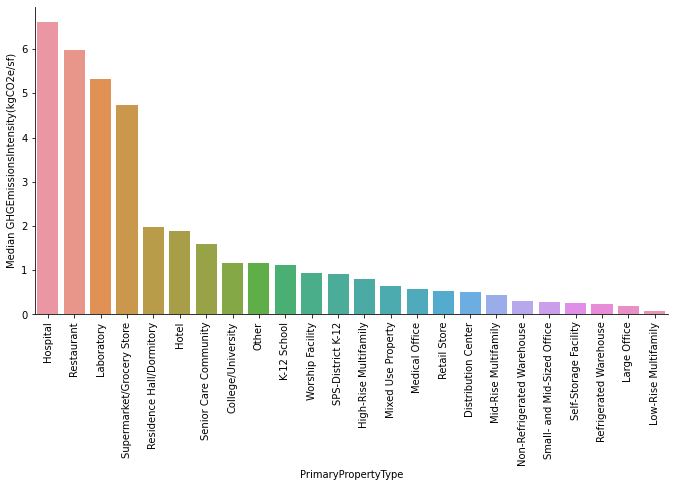

In [14]:
#Print Median GHG Emissions Intensity bar plot for building Primary Property Type
sns.catplot(x='PrimaryPropertyType', y='Median GHGEmissionsIntensity(kgCO2e/sf)', data=GHG_Emission ,height=5,aspect=2,kind='bar')
plt.xticks(rotation=90);

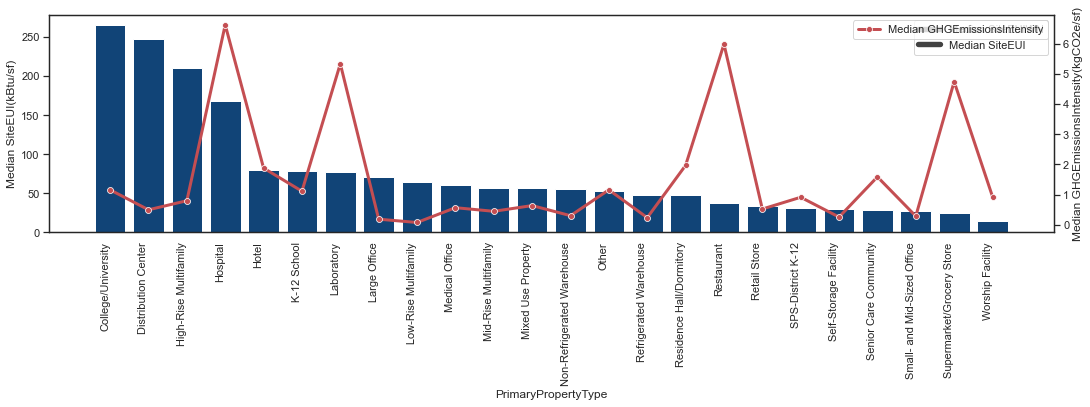

In [15]:
#Print Median EUI bar plot and Median GHG Emissions Intensity line plot for building Primary Property Type
sns.set(style="white", rc={"lines.linewidth": 3})
fig, ax1 = plt.subplots(figsize=(18,4))
plt.xticks(rotation=90, ha='right')
ax2 = ax1.twinx()
sns.barplot(x=Site_EUI['PrimaryPropertyType'], 
             y=Site_EUI['Median SiteEUI(kBtu/sf)'], 
            color='#004488',ax=ax1
           )
plt.xticks(rotation=90)
sns.lineplot(x=GHG_Emission['PrimaryPropertyType'], 
             y=GHG_Emission['Median GHGEmissionsIntensity(kgCO2e/sf)'],
             color='r',
             marker="o",ax=ax2
            )

categorical_1=['Median SiteEUIWN','Median SiteEUI']
ax1.legend(categorical_1, facecolor='w')
categorical_2=['Median GHGEmissionsIntensity']
ax2.legend(categorical_2, facecolor='w')

plt.show()
sns.set()

***MACHINE LEARNING MODEL***

In [16]:
# Import ML Tools
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics, model_selection
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [17]:
#Drop dependent feature
df1=df1.drop(['GHGEmissionsIntensity(kgCO2e/ft2)'],axis=1)

In [18]:
#categorical data
categorical_cols = ['BuildingType', 'PrimaryPropertyType','Neighborhood', 'YearBuilt','NumberofFloors'] 
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
df1[categorical_cols] = df1[categorical_cols].apply(lambda col: le.fit_transform(col))

In [19]:
building_ohe = df1
for col in categorical_cols:
    col_ohe = pd.get_dummies(building_ohe[col], prefix=col)
    building_ohe = pd.concat((building_ohe, col_ohe), axis=1).drop(col, axis=1)

In [20]:
building_ohe

,SiteEUI(kBtu/sf),BuildingType_0,BuildingType_1,BuildingType_2,BuildingType_3,BuildingType_4,BuildingType_5,BuildingType_6,PrimaryPropertyType_0,PrimaryPropertyType_1,...,NumberofFloors_40,NumberofFloors_41,NumberofFloors_42,NumberofFloors_43,NumberofFloors_44,NumberofFloors_45,NumberofFloors_46,NumberofFloors_47,NumberofFloors_48,NumberofFloors_49
0,78.9,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,94.4,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,96.6,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,460.4,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,120.1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,25.6,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3336,48.6,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3337,52.7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3338,34.8,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Define X and y
X = building_ohe.drop(['SiteEUI(kBtu/sf)'],axis=1)
y = building_ohe['SiteEUI(kBtu/sf)'] 

In [22]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, random_state=2, test_size=0.30)

In [23]:
lr = LinearRegression()

In [24]:
lr.fit(X_train, y_train)

LinearRegression()

In [25]:
predictions = lr.predict(X_test)

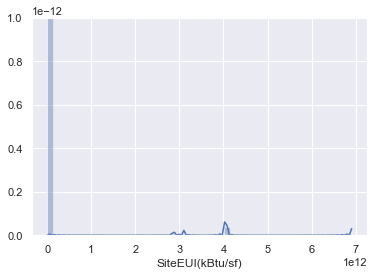

In [55]:
sns.distplot((y_test-predictions),bins=50);

In [56]:
coeffecients = pd.DataFrame(lr.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
BuildingType_0,-5.356923e+13
BuildingType_1,-5.356923e+13
BuildingType_2,-5.356923e+13
BuildingType_3,-5.356923e+13
BuildingType_4,-5.356923e+13
...,...
NumberofFloors_45,0.000000e+00
NumberofFloors_46,4.051629e+12
NumberofFloors_47,4.051629e+12
NumberofFloors_48,0.000000e+00
